<a href="https://colab.research.google.com/github/xidic81/Multilayer-Perceptron/blob/main/fashion-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!mv "/content/fashion_mnist_jpg.zip" .
!unzip "fashion_mnist_jpg.zip"
!mv '/content/fashion_mnist_jpg' fashion_mnist
!rm -r '/content/fashion_mnist_jpg.zip'

mv: cannot stat '/content/fashion_mnist_jpg.zip': No such file or directory
unzip:  cannot find or open fashion_mnist_jpg.zip, fashion_mnist_jpg.zip.zip or fashion_mnist_jpg.zip.ZIP.
mv: cannot stat '/content/fashion_mnist_jpg': No such file or directory
rm: cannot remove '/content/fashion_mnist_jpg.zip': No such file or directory


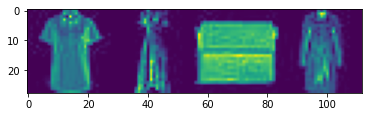

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from glob import glob

image_path_list = glob("/content/fashion_mnist/test/*/*.jpg")  

img1  = plt.imread(random.choice(image_path_list))
img2  = plt.imread(random.choice(image_path_list))
img3  = plt.imread(random.choice(image_path_list))
img4  = plt.imread(random.choice(image_path_list))


images = np.concatenate([img1,img2,img3,img4],1)
plt.imshow(images)

In [23]:
def one_hot_encoding(n,n_classes):
  result = np.zeros(n_classes)
  result[n]=1.0
  return result

def flatten(x):
  hasil = []
  n_baris = x.shape[0]
  n_kolom = x.shape[1]
  for i in range(n_baris):
    for j in range(n_kolom):
      hasil.append(x[i][j])
  return np.array(hasil)      

In [24]:
def load_dataset(root_path):
  categories = os.listdir(root_path)
  data = []
  for c in categories:
    c_dir = os.path.join(root_path,c)
    print("Memuat {}".format(c_dir))
    daftar_file_gambar = os.listdir(c_dir)
    for file_gambar in daftar_file_gambar:
      path_gambar = os.path.join(c_dir,file_gambar)
      data_gambar = flatten(plt.imread(path_gambar))
      data_gambar = data_gambar/255.0
      item = {}
      label = one_hot_encoding(int(c),10)
      item["input"] = data_gambar
      item["label"] = label
      data.append(item) 
  return data    

In [25]:
training_dataset = load_dataset(root_path = "/content/fashion_mnist/train")
testing_dataset = load_dataset(root_path = "/content/fashion_mnist/test")

Memuat /content/fashion_mnist/train/5
Memuat /content/fashion_mnist/train/4
Memuat /content/fashion_mnist/train/9
Memuat /content/fashion_mnist/train/8
Memuat /content/fashion_mnist/train/3
Memuat /content/fashion_mnist/train/2
Memuat /content/fashion_mnist/train/0
Memuat /content/fashion_mnist/train/7
Memuat /content/fashion_mnist/train/6
Memuat /content/fashion_mnist/train/1
Memuat /content/fashion_mnist/test/5
Memuat /content/fashion_mnist/test/4
Memuat /content/fashion_mnist/test/9
Memuat /content/fashion_mnist/test/8
Memuat /content/fashion_mnist/test/3
Memuat /content/fashion_mnist/test/2
Memuat /content/fashion_mnist/test/0
Memuat /content/fashion_mnist/test/7
Memuat /content/fashion_mnist/test/6
Memuat /content/fashion_mnist/test/1
